In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import calendar

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',index_col='date')

# Clean data
df = df[(df['value']>=df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    
    fig, ax = plt.subplots(figsize=(11, 9))
    df.plot(ax=ax, legend = False, title= 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019', colormap='RdYlBu')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df.index = pd.to_datetime(df.index)
    df['month'] = [d.month for d in df.index]
    df['year'] = [d.year for d in df.index]
    df_grp = df.groupby(['year','month'])
    df_bar = df_grp.mean()
    df_bar.index.names = ['year','month']
    df_bar.reset_index(inplace=True)
    df_bar['Months'] = df_bar['month'].apply(lambda x: calendar.month_name[x])
    
    

    # Draw bar plot
    g = sns.catplot(x='year',y='value',hue='Months',kind='bar',data=df_bar, palette='muted',height=5,aspect=2, legend=True,
           hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                        'July', 'August', 'September', 'October', 'November', 'December'],
           legend_out=False)
    g.set_ylabels("Average Page Views")
    g.set_xlabels("Years")
    fig = g.fig


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(1,2, figsize=(14,6))

    ax1 = sns.boxplot(x='year',y='value', data=df_box,ax=ax[0])
    ax2 = sns.boxplot(x='month',y='value',data=df_box,ax=ax[1],
                 order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

    ax1.set(xlabel="Year", ylabel = "Page Views")
    ax2.set(xlabel="Month", ylabel = "Page Views")

    ax1.set(title='Year-wise Box Plot (Trend)')
    ax2.set(title='Month-wise Box Plot (Seasonality)')




    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


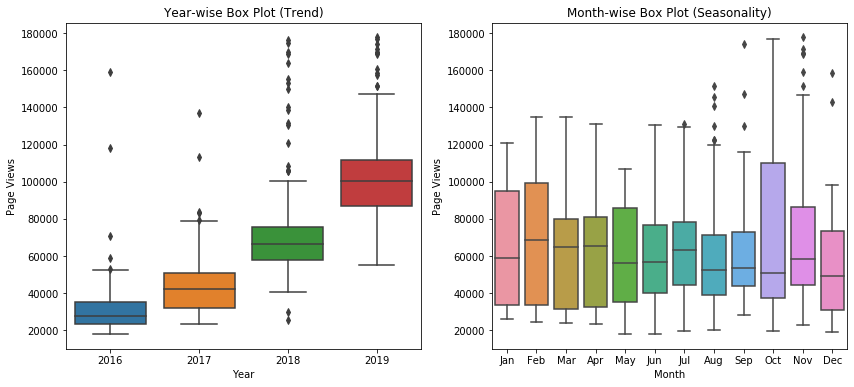

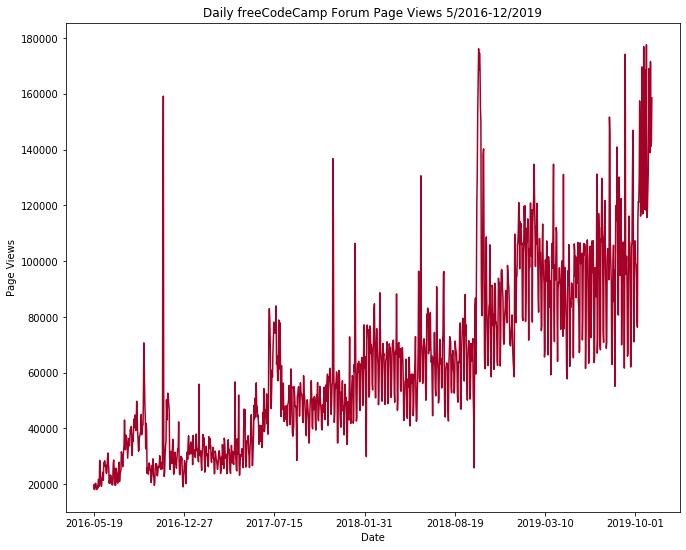

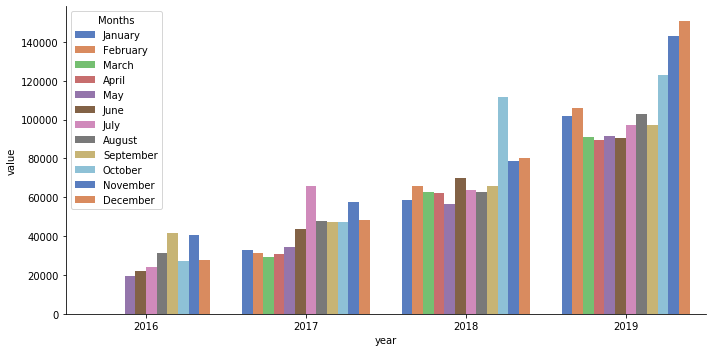

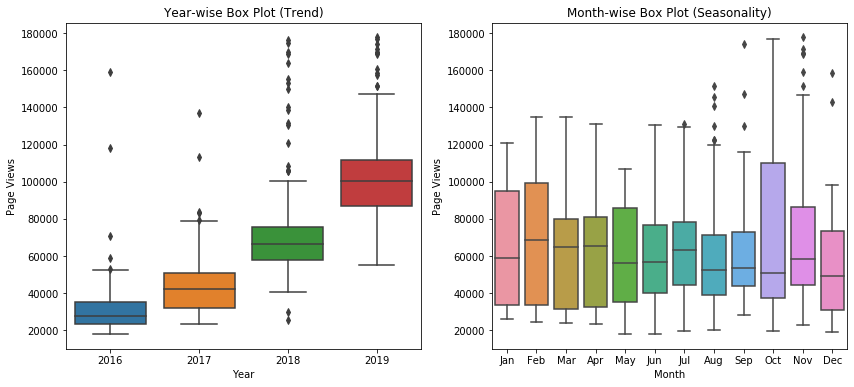

In [45]:
# This entrypoint file to be used in development. Start by reading README.md
#import time_series_visualizer
from unittest import main

# Test your function by calling it here
draw_line_plot()
draw_bar_plot()
draw_box_plot()

# Run unit tests automatically
#main(module='test_module', exit=False)

In [55]:
df = pd.read_csv('fcc-forum-pageviews.csv',index_col='date')

In [56]:
df.shape

(1304, 1)

In [57]:
df = df[(df['value']>=df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [59]:
int(df.count())

1238

Text(0, 0.5, 'Page Views')

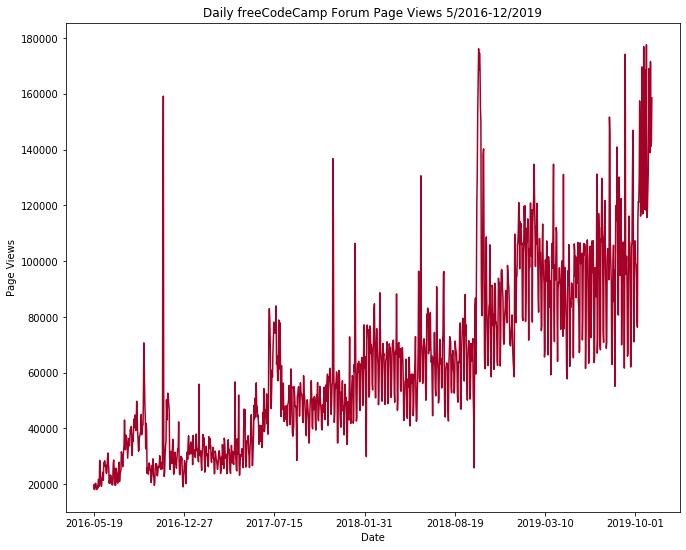

In [6]:
fig, ax = plt.subplots(figsize=(11, 9))
fig = df.plot(ax=ax, legend = False, title= 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019', colormap='RdYlBu')
plt.xlabel('Date')
plt.ylabel('Page Views')

In [7]:
df.index = pd.to_datetime(df.index)
df['month'] = [d.month for d in df.index]


,value,month
date,,
2016-05-19,19736,5
2016-05-26,18060,5
2016-05-27,19997,5
2016-05-28,19044,5
2016-05-29,20325,5
...,...,...
2019-11-24,138875,11
2019-11-29,171584,11
2019-11-30,141161,11


In [12]:
df['year'] = [d.year for d in df.index]

In [13]:
df_grp = df.groupby(['year','month'])
df_bar = df_grp.mean()

In [14]:
import calendar
df_bar.index.names = ['year','month']
df_bar.reset_index(inplace=True)
df_bar['Months'] = df_bar['month'].apply(lambda x: calendar.month_name[x])


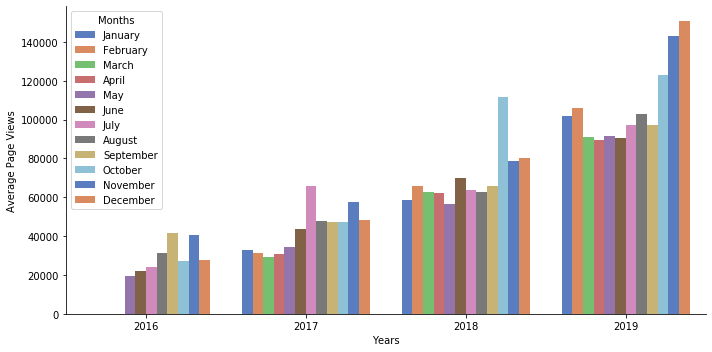

In [50]:
g = sns.catplot(x='year',y='value',hue='Months',kind='bar',data=df_bar, palette='muted',height=5,aspect=2, legend=True,
           hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
           legend_out=False)

g.set_ylabels("Average Page Views")
g.set_xlabels("Years")


In [16]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016


[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

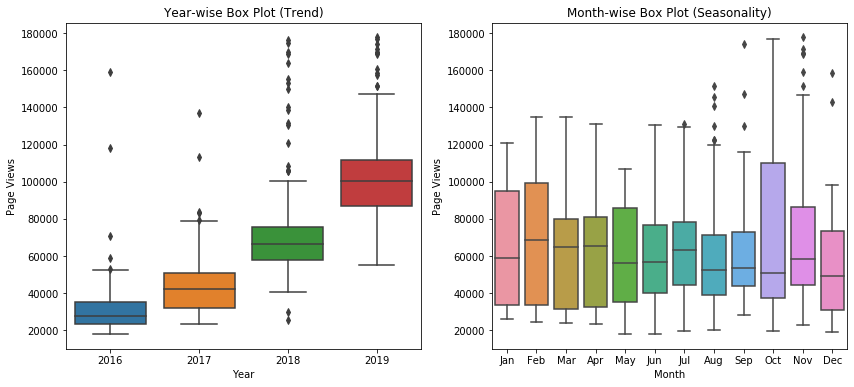

In [34]:
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax1 = sns.boxplot(x='year',y='value', data=df_box,ax=ax[0])
ax2 = sns.boxplot(x='month',y='value',data=df_box,ax=ax[1],
                 order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

ax1.set(xlabel="Year", ylabel = "Page Views")
ax2.set(xlabel="Month", ylabel = "Page Views")

ax1.set(title='Year-wise Box Plot (Trend)')
ax2.set(title='Month-wise Box Plot (Seasonality)')